# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/e3la/checkpoint-five/main/alltitles.csv'
urldoi = 'https://raw.githubusercontent.com/e3la/checkpoint-five/main/alldoi-permissionsall.csv'

df1= pd.read_csv(url)
df2 = pd.read_csv(urldoi)

df = pd.merge(df1, df2, left_on="doi", right_on="DOI")


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

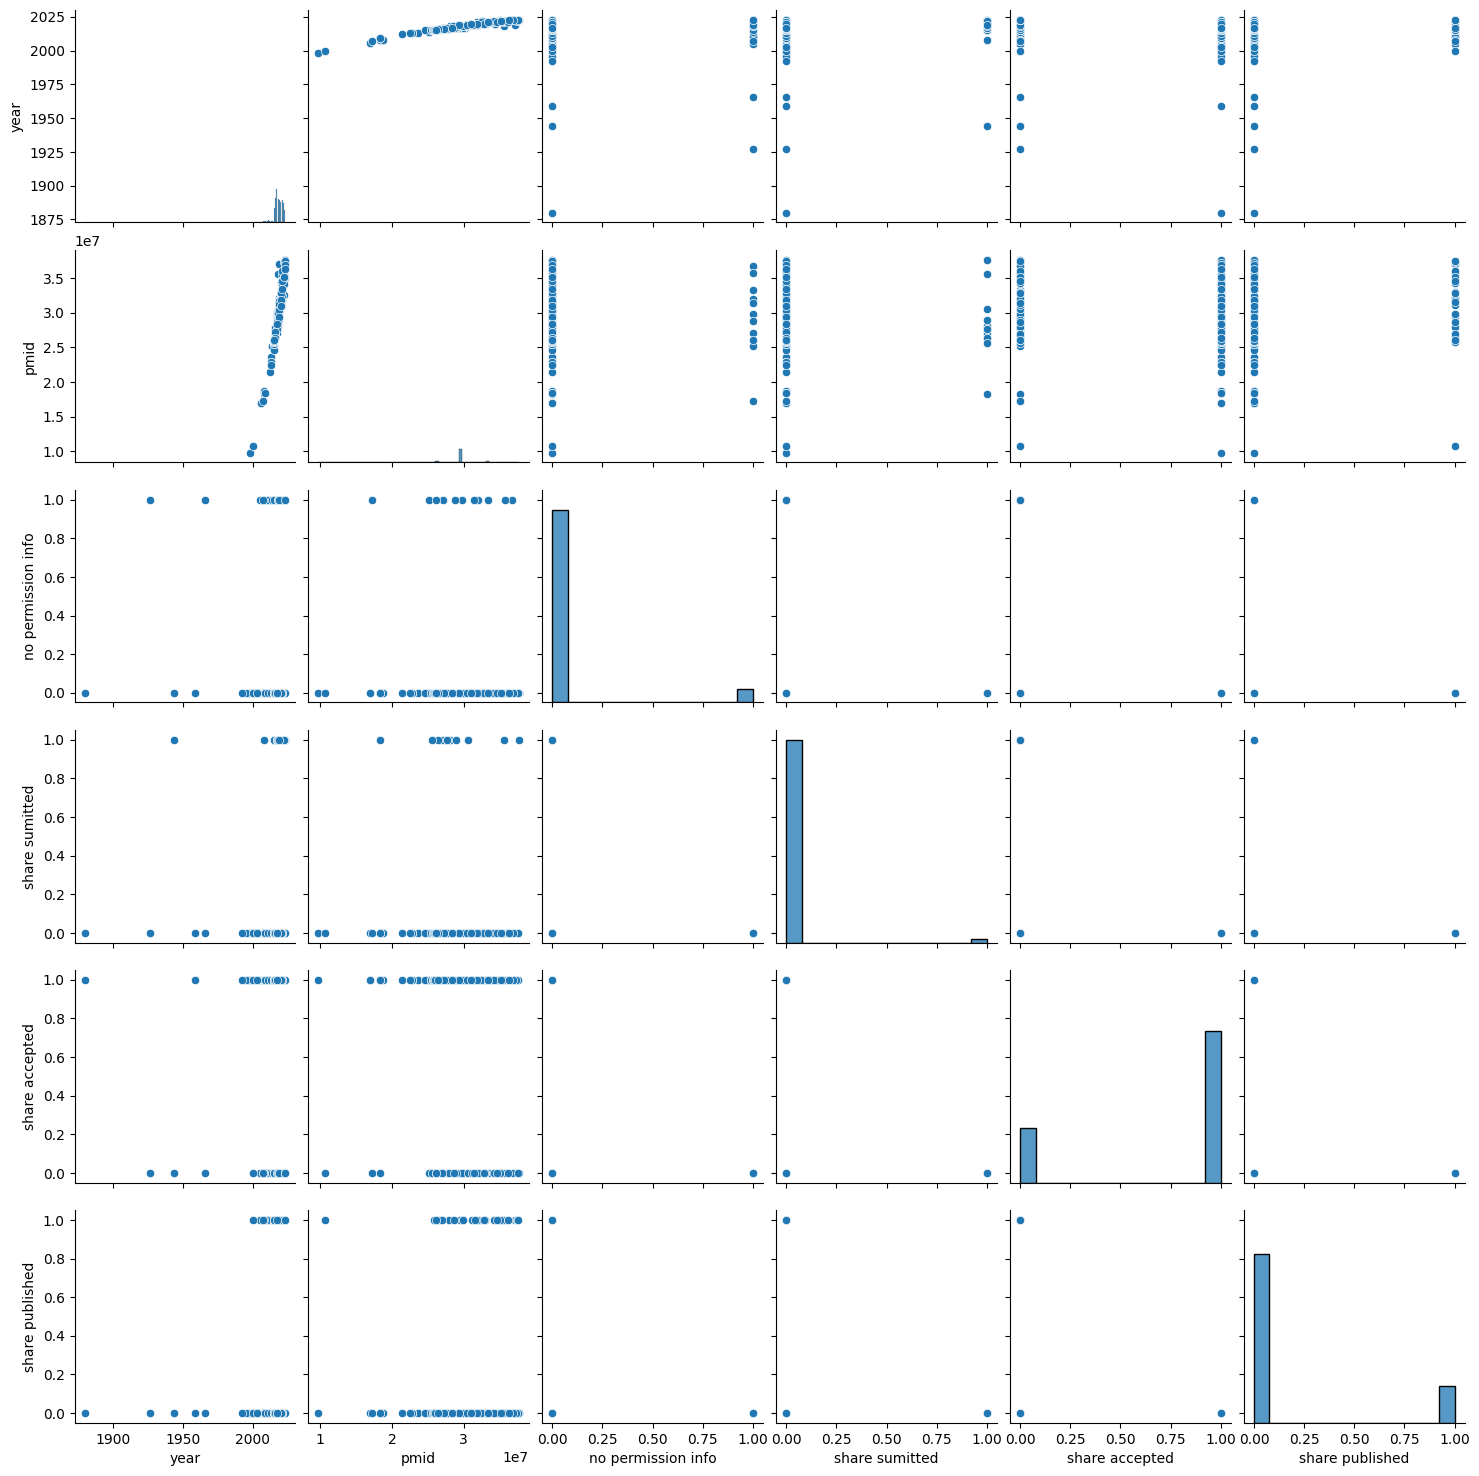

In [12]:
sns.pairplot(df)
plt.show()

<ipython-input-13-c29a8587184a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


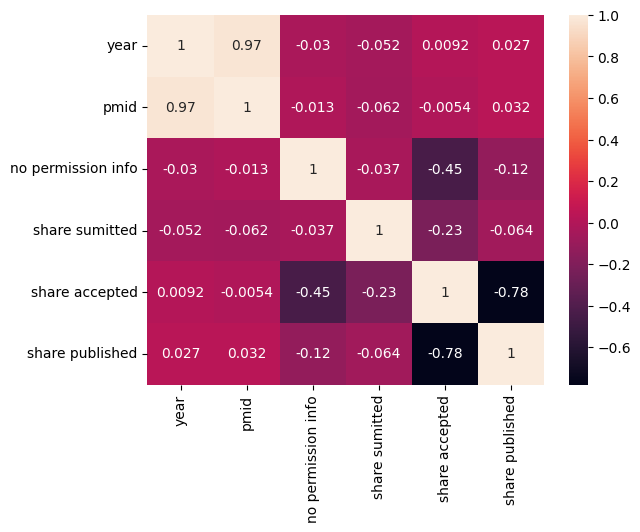

In [13]:
sns.heatmap(df.corr(), annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [21]:
X = df['share published']
y = df['year']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train
y_train

729     2009.0
739     2018.0
571     2020.0
900     2018.0
2319    2020.0
         ...  
350     2007.0
1930    2018.0
79      2017.0
1859    2017.0
1544    2021.0
Name: year, Length: 1787, dtype: float64

In [22]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.092
Date:                Mon, 16 Oct 2023   Prob (F-statistic):              0.296
Time:                        20:32:54   Log-Likelihood:                -5682.6
No. Observations:                1787   AIC:                         1.137e+04
Df Residuals:                    1785   BIC:                         1.138e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2017.7865      0.153   1.32e+04      0.000    2017.487    2018.086
share published     0.3687      0.353      1.045      0.296      -0.323       1.061
==============================================================================
Omnibus:                     3150.352   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4024685.489
Skew:                         -12.016   Prob(JB):                         0.00
Kurtosis:                     234.247   Cond. No.                         2.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Error Terms

Finally, plot your error terms!

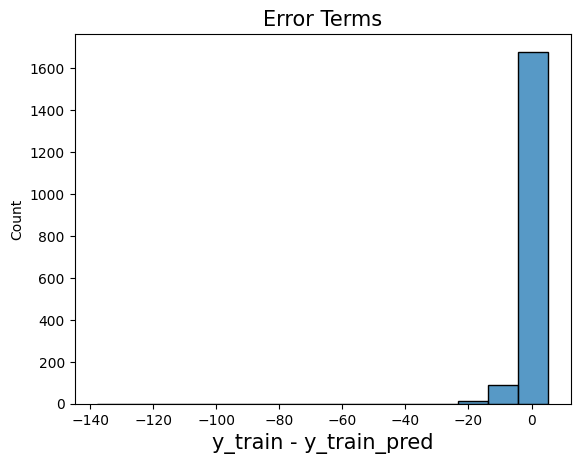

In [23]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.001
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? No, not at all. My dataset is all about descriptive stats, not inferential.
3. Was your plot of the error terms a bell curve? Nope.